# <center> Econ 590: Quantitative Economics (with Python) </center>
## <center> Homework 5 (Individual)</center>

# <font color='red'>Name:</font>

# <font color='red'>Instructions:</font>
- Save all of your code to a .py file and name it as **username_hw5.py**, where username is your email without the '@purdue.edu'. 
    - If you work in Jupyter notebook -- you can export it via 'File -> Downloaded As -> Python (.py)' option in the menu bar or copy and paste the code into a blank .py file. **In either case you should remove any test cells/code that is outside of functions.**
    - Submit only username_hw5.py file
- For each question, your file should contain a function labeled **q#** with input/output requirements specified below. 
    - The input refers to the arguments passed to the function. 
    - The output refers to what is returned by the function.
    - We may require output to file or screen within a function, but if that is the case it will be clearly specified.
    - Your functions may call other functions or classes that you create, but they have to be included in the file (i.e., the file that you submit should be self-contained).
    - If your function calls on functions from other libraries, you need to load them within the function (e.g., if you use the os library you should assume that it has been installed on the computer but it has not been imported before calling your function).
    
- We will run your code using the following code (assuming that your file is in the current working directory):

```python 
from importlib import import_module
m=import_module('username_hw5')
m.q#(args)
```

Grading: Each question is graded on a 3-point scale + 1 point for following the instructions 
- 0 -- no or minimal work submitted (e.g., minor modification of the 'starting point')
- 1 -- some work done but there are errors running/executing the code or results are mostly incomplete
- 2 -- code runs, but results are either somewhat incomplete, incorrect, or there is clear room for improvement (e.g., no comments in the code, graphs are not labelled, etc.) 
- 3 -- all results complete and correct with clear commented code 

In [1]:
#libraries that will be used in this HW 
import os
import shutil as sh
import pandas as pd
#you can add other libraries as needed

In [1]:
# To find your working directory:
%pwd 
# Code in case you want to change your working directory:  %cd


'C:\\Users\\xinxi\\Dropbox\\Fall 2021\\03-hw\\ECON590\\HW2'

# Question 1
Suppose you own one share of company 'XYZ'. Suppose that today's price is \\$1.00. Every day there is a 0.005 chance that the stock will go up by \\$0.10, a 0.005 chance that the stock will go down by \\$0.05 and a 0.0001 chance that the company goes bankrupt (i.e., the stock price goes to \\$0.00). 

What is the expected value of one share a year from now? 

To answer this question, conduct a Monte Carlo simulation 10,000 times, assuming there are 365 days in a year, and that if the price reaches \\$0.00 at any point in time the company goes bankrupt.

- **Input**: none
- **Output**: the expected value

In [9]:
def simOne():
    """simulate the result for one year"""
    price=1.00
    for t in range(365):
        rn=random.random()
        if rn<.005:  # with probability 0.005 that the stock will go up by $0.1 
            price+=0.10
        elif rn<.010:  # with probability 0.005 that the stock will go down by $0.05 
            price-=0.05
        elif rn<.0101: # with probability 0.0001 that the company goes bankrupt
            price=0
            break  # if company goes bankrupt, stop the loop
        else:
            pass 
        
        if price==0:
            break # if the price==0, the company also goes bankrupt. stop the loop
        else:
            pass
    return price

In [10]:
def q1():
    nsim=10000
    res=np.empty(nsim)
    #simulate 10000 times
    for i in range(nsim):
        res[i]=simOne()
        
    return np.mean(res)

In [11]:
q1()

1.053195

# Question 2

Modify the codes in the lecture to produce a graph that shows how many people you would need in a group to have a 50-50 chance that at least 2,3,4 people share a birthday.

- **Input**: none
- **Output**: a pdf figure saved to file username_hw5_q2.pdf (saved to the output folder)
    - Make sure that your graph contains axis labels and proper legends


In [1]:
def checkDups(group, num):
    ''' function to check whether a group has a duplicate birthday. 
        group is a numpy array'''
    values, counts = np.unique(group, return_counts=True)
    max_dup = np.max(counts)
    if max_dup >= num:
        return 1
    else:
        return 0

def checkProp(groupSize,same_number, numberGroups=10000):
    ''' function to get the proportion of groups with duplicate birthdays'''
    groups = np.random.randint(low=1,high=366,size=(numberGroups, groupSize))
    return np.mean([checkDups(g,same_number) for g in groups]) #list comprehension

In [2]:
def q2():
    groupSizes = np.arange(5,250,20)
    
    
    estimates_list = []
    same_number_list = []
    for i in range(2,5):
        same_number = i
        estimates = [checkProp(n,same_number) for n in groupSizes]
        same_number_list.append(same_number)
        estimates_list.append(estimates)

    fig, ax = plt.subplots()
    ax.set_xticks(np.linspace(5,255,11))
    ax.set_yticks(np.linspace(0, 1, 5))
    for i in range(3): 
        color_list = ['black','green','blue']
        plt.plot(groupSizes, estimates_list[i], ls='-', c=color_list[i], label='Proportion With At Least '+str(same_number_list[i]))
    plt.axhline(y=0.5, color='r', linestyle='-')
    plt.grid()
    plt.legend()
    plt.ylim(0,1)
    plt.xlabel('Group Size')
    plt.ylabel('Proportion')
    plt.show()
    fig.savefig("HW5_Output\\yrosokha_hw5_q2.pdf")

In [3]:
q2()

NameError: name 'np' is not defined

# Question 3

Use the SPDR S&P 500 ETF Trust historical data to simulate its future price trend with 95% confidence interval, plot the result. 

SPY_6month.csv contains the daily adjusted close price data of SPDR S&P 500 ETF Trust in the last six months. Please import the data, calculate the daily change in price and use these changes as the possible price changes for SPY in the future. 

Here we assume that the price change in each trading day is independent. (So you can treat the daily price changes as indepdent random draws.)

Randomly draw the price changes with replacement to simulate SPY's future 100 days' prices, repeat the process for 10,000 times, calculate the average and it 95% confidence interval

- **Input**: none
- **Output**: a pdf figure saved to file username_hw7_q3.pdf (saved to the output folder)

*Make sure that "SPY_6month.csv" is in your data folder.

In [18]:
import pandas as pd

In [19]:
def q3():
    data = pd.read_csv(datafolder+"SPY_6month.csv")
    price = data["Adj Close"]

    price_series = pd.Series(price)
    price_changes = price_series.diff().dropna().values
    newest_price = price.dropna().tail(1).item()

    random.seed(10)

    # Generate the simulated data
    nsim=10000
    N_days = 100
    res=np.empty((nsim,N_days))
    for i in range(nsim):

        price = newest_price     

        changes = random.choices(price_changes, k = N_days)
        for j,x in enumerate(changes):
            price +=  x
            res[i,j] = price


    # Calculate the average price and confidence interval

    average = np.percentile(res, 50, axis=0)
    CI_lower =  np.percentile(res,2.5, axis=0)
    CI_upper =  np.percentile(res,97.5, axis=0)    

    fig, ax = plt.subplots()
    ax.set_xticks(np.linspace(0,100,11))
    ax.set_yticks(np.linspace(0,600,21))
    plt.plot(np.arange(0,100,1), average, ls='-', c="blue", label='Simulated Price Trend')
    plt.plot(np.arange(0,100,1), CI_upper, ls='--', c="orange", label='Upper CI')
    plt.plot(np.arange(0,100,1),CI_lower, ls='--', c="orange", label='Lower CI')
    plt.legend()
    plt.xlabel('T')
    plt.ylabel('Price')
    plt.show()
    fig.savefig(outputfolder+'yrosokha_hw7_q3.pdf')

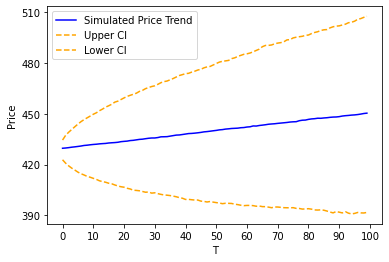

In [20]:
q3()

# Question 1

The historical volatility of a stock is an important measurement of the risk of the investment. A stock with a relatively stable price has low volatility. A highly volatile stock is riskier but may also yield higher returns. There are many measures of volatility. The most common one is the standard deviation of a stock price; however, it doesn't tell you how volatile your stock is in comparison with the systematic risk of the entire market. To measure the relative volatility of a stock, traders use the Beta coefficient. 

In this homework question, we will calculate a simplified version of the beta coefficient and compare the Beta coefficients between two leading stocks in the health center. Use the beta coefficient to compare the riskiness of these two stocks and use a permutation test to decide how significant the difference is. 

In StockPrice_5Year_Weekly.csv, you will find the 5-year weekly price of S&P 500, Pfizer, and Johnson Group. We will use the S&P 500 as the market benchmark. 


- **Input**: none
- **Output**: 
    1. a pdf figure saved to file username_hw8_q1.pdf (saved to the output folder)
        - Make sure that your graph contains axis labels and proper legends
    2. print out the two-sided test p-value

*Make sure that "StockPrice_5Year_Weekly.csv" is in the data folder. 

To calculate the Beta coefficient of a stock market, you need to follow these steps:
1. Calculate the weekly return of all three stocks, $R_{SP500}$, $R_{Pfizer}$, $R_{Johnson}$:

    $$ R_{stock} = ln(\frac{price_{t}}{price_{t-1}})$$
    
2. Calculate the monthly Beta coefficients for Pfizer and Johnson, using S&P 500 as the benchmark. The Beta coefficient is defined as 

$$ \beta = \frac{Covariance(R_{benchmark}, R_{stock})}{Variance(R_{benchmark})} $$

You can find an example of calculating the Beta coefficient in excel from this link: https://financetrainingcourse.com/education/2011/04/market-risk-metrics--beta-with-respect-to-market-indices/

Below, you will also find a sample code to calculate the Beta coefficient in Python. Feel free to modify the code for your calculation. 

For simplicity, disregard the calendar month, use every 4 weekly price changes to calculate the monthly beta coefficients. That is month 1's beta is calculated based on observation 0 to 3, month 2's beta is based on observation 4 to 7... 

3. Once you calculate the monthly Beta coefficients, test whether the 75th Percentile monthly Beta coefficitent of Pfizer is different from the 75th Percentile monthly Beta coefficient of Johnson. Use the permutation test to generate 10,000 random permutations for each group. 

Reference: https://www.investopedia.com/terms/b/beta.asp 



In [3]:
import pandas as pd
import os

In [4]:
# Sample code to calculate the Beta coefficient; Assume we have the following 9 weeks prices for a stock and the market index
Stock_WeeklyPrice = [20,35,40,37,22,34,55,35,42]
Market_WeeklyPrice = [300, 340, 400, 320, 200, 300, 500, 380, 400]

# A useful code to calculate the percentage change within a series is called np.Series.pct_change()
# It returns the percentage change between the current and a prior element, which can be seen as (P_t / P_(t-1))-100%
PC_stock = pd.Series(Stock_WeeklyPrice).pct_change().dropna()
PC_market = pd.Series(Market_WeeklyPrice).pct_change().dropna()
Return_stock = np.log(PC_stock+1)
Return_market = np.log(PC_market+1)

# Calculate the first month's beta coefficient (use the first 4 weekly price changes )
# You can use the command np.cov to obtain the covariance and the variance for these two stocks
cov_matrix = np.cov(Return_stock[0:4], Return_market[0:4])
beta_month1 = cov_matrix[0,1] / cov_matrix[1,1]
beta_month1

1.3366962317954698

In [12]:
def q1():

    data = pd.read_csv(datafolder+"StockPrice_5Year_Weekly.csv")

    # Calculate Weekly Returns
    PC_SP500 =  pd.Series(pd.to_numeric(data['S&P 500'].str.replace(',',''))).pct_change().dropna().values
    PC_Pfizer = pd.Series(pd.to_numeric(data['Pfizer'])).pct_change().dropna().values
    PC_Johnson = pd.Series(pd.to_numeric(data['Johnson'])).pct_change().dropna().values

    Return_SP500 = np.log(PC_SP500+1)     
    Return_Johnson = np.log(PC_Johnson+1)                  
    Return_Pfizer = np.log(PC_Pfizer + 1)

    # Define beta coefficient
    def beta(data, benchmark=Return_SP500):
        cov_matrix = np.cov(data, benchmark)
        return cov_matrix[0,1] / cov_matrix[1,1]

    # Calculate the monthly beta coefficients
    Beta_Pfizer = []
    Beta_Johnson = []
    month = 0
    while month < len(Return_SP500) :
        Beta_Pfizer.append(beta(Return_Pfizer[month:month+4],Return_SP500[month: month+4] ))
        Beta_Johnson.append(beta(Return_Johnson[month: month+4], Return_SP500[month: month+4])  )
        month += 4

    diff = np.percentile(Beta_Pfizer, 75) - np.percentile(Beta_Johnson, 75)

    # Permutation test
    sample1=Beta_Pfizer
    n1 = len(sample1)
    sample2=Beta_Johnson
    n2 = len(sample2)
    combined=np.append(sample1,sample2)
    n = len(combined)

    idx = np.arange(n)
    sim_d = []
    for i in range(10000):
        np.random.shuffle(idx)
        d = np.percentile(combined[idx][:n1], 75) - np.percentile(combined[idx][n1:], 75)
        sim_d.append(d)
    
    plt.hist(sim_d,20,alpha=0.5, label='Distribution of the Test Statistic')
    plt.plot([diff, diff], [0, 10000/10], 'b--', label='Original Stat') 
    plt.xlabel('Test Statistic')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(outputfolder+"q1.pdf", bbox_inches='tight')

    #calculating the p-value for two-sided test
    count=(np.abs(sim_d)>=np.abs(diff)).sum()
    print("Count: ",count," out of ",10000)
    p_val=np.round((count+1)/(1+10000),3)
    print("Two-sided test p-value: ",p_val)
   

Count:  482  out of  10000
Two-sided test p-value:  0.048


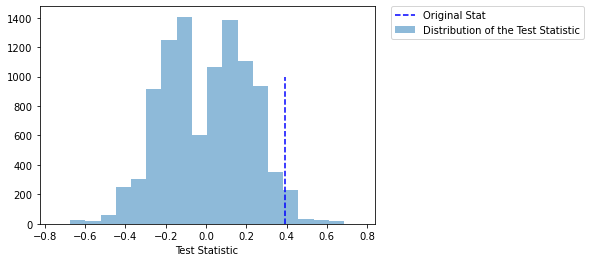

In [13]:
q1()

# Question 2
Using bootstrapping approach, create and plot the sampling distribution of the average GDP per capita data across the OECD countries in 2010 and mark the 95% confidence interval.

- **Input**: none
- **Output**: a pdf figure saved to file username_hw8_q2.pdf (saved to the output folder)
   - Make sure that your graph contains axis labels and proper legends

*Make sure that "gdppercapita.csv" is in the data folder. 


In [ ]:
oecd={'country':['Australia','Austria', 'Belgium', 'Canada','Chile','Colombia','Czech Republic','Denmark', 'Estonia',\
                         'Finland', 'France', 'Germany', 'Greece', 'Hungary','Iceland','Ireland','Israel','Italy', 'Japan', \
                         'South Korea','Latvia', 'Lithuania','Luxembourg', 'Mexico', 'Netherlands','New Zealand','Norway','Poland',\
                         'Portugal','Slovak Republic','Slovenia','Spain','Sweden','Switzerland','Turkey', 'United Kingdom','United States'],\
              'join_year':[1971,1961, 1961, 1961,2010,2020,1995,1961, 2010, 1969, 1961, 1961, 1961, 1996,\
                1961,1961,2010,1962, 1964,1996,2016, 2018,1961, 1994, 1961,1973,1961,1996,1961,\
                2000,2010,1961,1961,1961,1961,1961,1961]}

In [14]:
def q2():
    oecd={'country':['Australia','Austria', 'Belgium', 'Canada','Chile','Colombia','Czech Republic','Denmark', 'Estonia',\
                         'Finland', 'France', 'Germany', 'Greece', 'Hungary','Iceland','Ireland','Israel','Italy', 'Japan', \
                         'South Korea','Latvia', 'Lithuania','Luxembourg', 'Mexico', 'Netherlands','New Zealand','Norway','Poland',\
                         'Portugal','Slovak Republic','Slovenia','Spain','Sweden','Switzerland','Turkey', 'United Kingdom','United States'],\
              'join_year':[1971,1961, 1961, 1961,2010,2020,1995,1961, 2010, 1969, 1961, 1961, 1961, 1996,\
                1961,1961,2010,1962, 1964,1996,2016, 2018,1961, 1994, 1961,1973,1961,1996,1961,\
                2000,2010,1961,1961,1961,1961,1961,1961]}

    # read data
    data=pd.read_csv(datafolder+'gdppercapita.csv',index_col=0)
    data=data.loc[oecd['country'],:]

    #create column of each year: the value of each cell is the boolean value 
    #of comparing the countries' joining year and 2010. 
    #So that I can use there True/False indices to get relevant cells in gdppercapita.csv
    dataIndex=pd.DataFrame(oecd,columns=['country','join_year'])
    dataIndex=dataIndex.set_index('country')
    dataIndex["2010"]=dataIndex['join_year']<=2010

    #use dataIndex to indicate which gdp per capita in data will be used. You will get a Series
    oecd2010=data[dataIndex]["2010"]
    print(oecd2010)
    oecd2010=oecd2010.dropna() 
    np.mean(oecd2010)
    oecd2010.shape[0]
    resampled_means = []
    for i in range(1000):
        #randomly selected 34 countries with replacement
        random_resample_indices = np.random.randint(oecd2010.shape[0],size=oecd2010.shape[0]) 
        m = np.mean(oecd2010[random_resample_indices])
        resampled_means.append(m)
    #.025 percentile
    low=np.percentile(resampled_means,2.5)
    #.975 percentile
    high=np.percentile(resampled_means,97.5)
    plt.hist(resampled_means)
    plt.plot([low, low], [0, 200], 'r--') 
    plt.plot([high, high], [0, 200], 'r--') 
    plt.xlabel("gdp per capita")
    plt.ylabel("frequency")
    plt.savefig(outputfolder+"hw8_q2.pdf")

country
Australia          41500.0
Austria            43300.0
Belgium            41100.0
Canada             40700.0
Chile              19400.0
Colombia               NaN
Czech Republic     28400.0
Denmark            44000.0
Estonia            22700.0
Finland            39800.0
France             36800.0
Germany            40400.0
Greece             28700.0
Hungary            22400.0
Iceland            40100.0
Ireland            43500.0
Israel             29700.0
Italy              36200.0
Japan              35800.0
South Korea        30400.0
Latvia                 NaN
Lithuania              NaN
Luxembourg         91700.0
Mexico             16200.0
Netherlands        46100.0
New Zealand        32200.0
Norway             62400.0
Poland             21800.0
Portugal           27200.0
Slovak Republic    25200.0
Slovenia           28700.0
Spain              32500.0
Sweden             43000.0
Switzerland        55900.0
Turkey             18000.0
United Kingdom     36500.0
United States      4

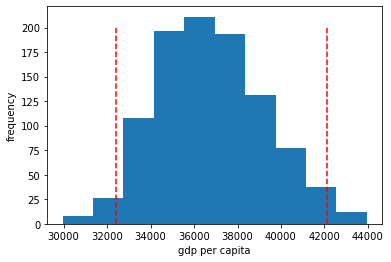

In [15]:
q2()

# Question 3
Suppose that the monthly economic growth is characterized by the following matrix:

\begin{equation*}
P =  \begin{vmatrix}
.95 & .04 & .01 \\
 .15&  .75 & .10  \\
 .01&  .49 & .50
\end{vmatrix}
\end{equation*}

Where the first state represents "normal growth", the second state represents "mild recession" and the third state represents "severe recession." For example, the matrix tells us that when the state is normal growth, the country will again experience normal growth next month with probability 0.95. Conditional on being in the state of economic growth, what is the probability of experiencing deep recession at least once over the next 12 months?

- **Input**: none
- **Output**: the probability



In [9]:
 def q3():
    def my_mc_simulation(current_state, states, P, T=10000):

        chain = np.zeros(T,dtype=int)
        #create a array with length is T. 
        #Each item is a state. The next state depends on P and the current state
        for t in range(0,T):
            chain[t] = current_state
            next_state = np.random.choice(states, p=P[current_state])
            current_state = next_state #moving to the next state

        return chain

    # state 0: normal growth; state 1: mild recession; state 2: severe recession
    P = np.array([[.95,.04,.01],[.15,.75,.10],[.01,.49,.50]])
    current_state = 0  # we set current_state=0 since we are asked to condtion on being in the state of economics growth
    states = np.arange(3)

    #Conditional on being in the state of economic growth, 
    #what is the probability of experiencing deep recession at least once over the next 12 months?
    current_state = 0
    T = 12

    #create a matrix with the demension is n_sim*T
    #each row will contain the result of a single simulation
    n_sim = 1000
    results = np.zeros((n_sim,T)) 
    for i in range(n_sim):
        results[i,:] = my_mc_simulation(current_state,states,P,T)

    # count how many state 2 in the matrix
    count = 0
    for i in range(n_sim):
        if (results[i,:]==2).any():
            count+=1

    print(count/n_sim)

In [12]:
q3()

0.196
